# Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt # I got this from stackoverflow and they suggested this import for plots
import datetime # I got this from stackoverflow and they suggested this import for plots

# Top 100 Posts

In [6]:
#the two csv files are below
comments_df = pd.read_csv('Data/comments_df_10.csv')
submission_df = pd.read_csv('Data/submission_df_10.csv')

#print the first 100 rows
topposts_df = pd.concat([comments_df.head(100), submission_df.head(100)])

topposts_df.head(100)

,Unnamed: 0,id,score,created_utc,body,parent_id,author,subreddit,title,num_comments,subreddit.display_name,selftext
0,0,fgs7erl,12349,1.581075e+09,They'd be fine.\n\nThe problem with poverty is...,t3_f08dxb,squigs,AskReddit,NaN,NaN,NaN,NaN
1,1,fgs4uvj,8282,1.581072e+09,I doubt a month is enough to really feel the e...,t3_f08dxb,_rightClick_,AskReddit,NaN,NaN,NaN,NaN
2,2,fgs9v44,449,1.581078e+09,It would be better if they had to live *with* ...,t3_f08dxb,thinksoftchildren,AskReddit,NaN,NaN,NaN,NaN
3,3,fgs5ek3,9070,1.581072e+09,It would be incredibly self-serving and boring...,t3_f08dxb,theacemaverick,AskReddit,NaN,NaN,NaN,NaN
4,4,fgs78x5,38080,1.581075e+09,There was this similar themed show in Hongkong...,t3_f08dxb,Eggmatros,AskReddit,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,fgsns9w,9,1.581089e+09,"“Yes, $10,000 unless we want two ply. Then it’...",t1_fgsh730,ClownfishSoup,AskReddit,NaN,NaN,NaN,NaN
96,96,fgse3ln,1250,1.581082e+09,"Anyone remember ""The Simple Life"" with Paris H...",t1_fgsciiz,Batchet,AskReddit,NaN,NaN,NaN,NaN
97,97,fgsl67u,842,1.581087e+09,Undercover Boss was fantastic propaganda.\n\n#...,t1_fgsfxlw,missed_sla,AskReddit,NaN,NaN,NaN,NaN
98,98,fgsilbw,1469,1.581085e+09,What I didnt like about undercover boss was it...,t1_fgsfxlw,jittery_raccoon,AskReddit,NaN,NaN,NaN,NaN


# Most Distinct Comment Authors

### 2.1: Which users have the most submissions/comments (top 5)?

In [18]:
topposts_df.head(5)

,Unnamed: 0,id,score,created_utc,body,parent_id,author,subreddit,title,num_comments,subreddit.display_name,selftext
0,0,hked3hu,4923,1.636762e+09,I just hope people don't forget how quick the ...,t3_qsmbnt,BobbyCharliebob,news,NaN,NaN,NaN,NaN
1,1,hkdyulz,6120,1.636756e+09,Hopefully the entire thing gets investigated n...,t3_qsmbnt,skinkbaa,news,NaN,NaN,NaN,NaN
2,2,hke10i9,2900,1.636757e+09,>and finally has the freedom to make her own m...,t3_qsmbnt,Balls_of_Adamanthium,news,NaN,NaN,NaN,NaN
3,3,hkdyk0i,8809,1.636756e+09,Dang I remember years back when this was a fle...,t3_qsmbnt,[deleted],news,NaN,NaN,NaN,NaN
4,4,hke06c1,14278,1.636756e+09,>It means Spears will now have a say in contro...,t3_qsmbnt,Fro_Yo_Joe,news,NaN,NaN,NaN,NaN


### 2.2: Which subreddit has the most distinct comment authors?

In [19]:
# from: https://stackoverflow.com/questions/19231871/

comments_df['created_time'] = pd.to_datetime(comments_df['created_utc'], unit='s')

#this will remove the data that has no body
comments_df.dropna(inplace=True)

#get dataframe with unique pairings of subreddit and author
sub_author_unique = comments_df.groupby(['subreddit','author'])['created_time'].count().reset_index()

#count the number of these pairings for each subreddit
sub_author_unique.groupby('subreddit')['author'].count().sort_values(ascending=False)

subreddit
AskReddit    1201
news         1150
aww           769
Music         376
movies        355
Name: author, dtype: int64

### 2.3: Which subreddit contains the greatest percentage of submissions with a body (i.e. contains a value in the body column)?

In [4]:
comments_df = pd.read_csv('Data/comments_df_10.csv')

comments_df.head()

,Unnamed: 0,id,score,created_utc,body,parent_id,author,subreddit
0,0,fgs7erl,12349,1.581075e+09,They'd be fine.\n\nThe problem with poverty is...,t3_f08dxb,squigs,AskReddit
1,1,fgs4uvj,8282,1.581072e+09,I doubt a month is enough to really feel the e...,t3_f08dxb,_rightClick_,AskReddit
2,2,fgs9v44,449,1.581078e+09,It would be better if they had to live *with* ...,t3_f08dxb,thinksoftchildren,AskReddit
3,3,fgs5ek3,9070,1.581072e+09,It would be incredibly self-serving and boring...,t3_f08dxb,theacemaverick,AskReddit
4,4,fgs78x5,38080,1.581075e+09,There was this similar themed show in Hongkong...,t3_f08dxb,Eggmatros,AskReddit


# Get by Day of the Week

### 3.1: Plot the total number of comments across all subreddits over time (line plot).

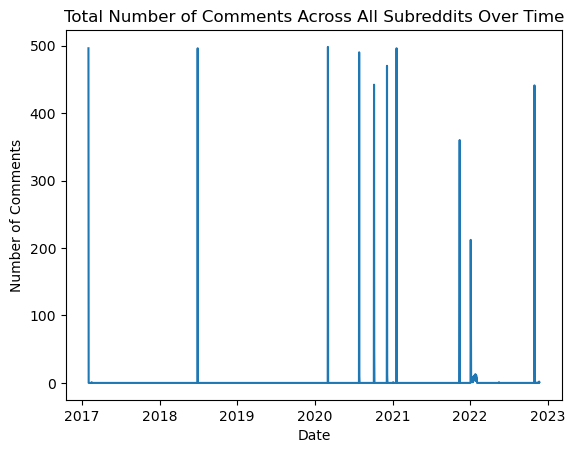

In [20]:
# Convert the created_utc field to a datetime object
comments_df['created_utc'] = pd.to_datetime(comments_df['created_utc'], unit='s')

# Group the data by day and sum the number of comments for each day
comments_df = comments_df.groupby(pd.Grouper(key='created_utc', freq='D')).agg({'id': 'count'})

# Plot the data as a line plot
plt.plot(comments_df.index, comments_df['id'])
plt.title('Total Number of Comments Across All Subreddits Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()

### 3.2: Plot a histogram showing the distribution of comment scores 

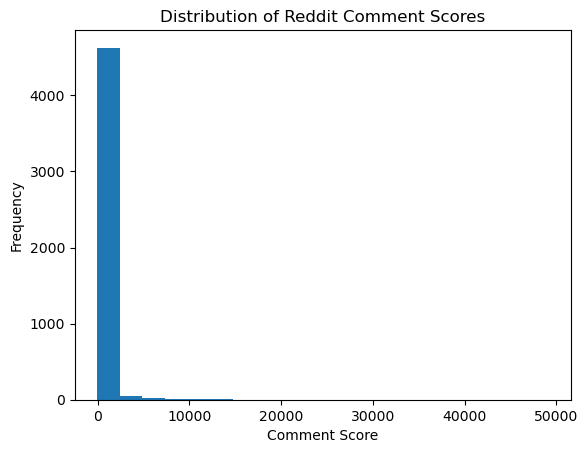

In [40]:
comments_df['created_utc'] = pd.to_datetime(comments_df['created_utc'], unit='s')

# Plot the histogram
fig, ax = plt.subplots()
comments_df['score'].plot(kind='hist', bins=20, ax=ax)
ax.set(xlabel='Comment Score', ylabel='Frequency', title='Distribution of Reddit Comment Scores')
plt.show()

### 3.3: Plot The Average Number of Comments per Day of the Week

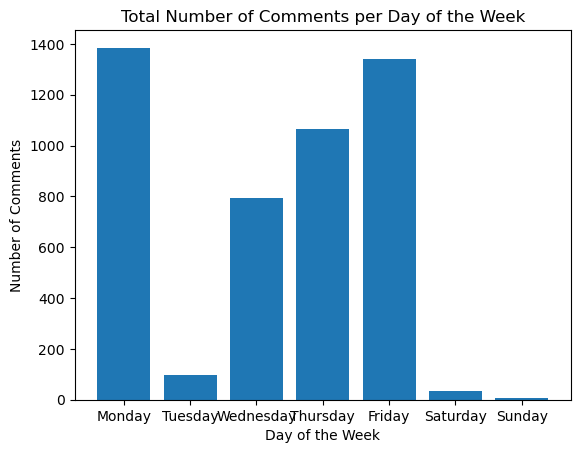

In [37]:


# Convert the created_utc column to a datetime object and extract the day of the week

comments_df['dow'] = pd.to_datetime(comments_df['created_utc'], unit='s').dt.day_name()

 

# Create a categorical variable for the day of the week and sort the categories

comments_df['dow'] = pd.Categorical(comments_df['dow'], categories=

    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],

    ordered=True)

 

# Group the comments by day of the week and count the number of comments

dow_counts = comments_df.groupby('dow')['created_utc'].count()

 

# Plot a bar chart of the total number of comments per day of the week

plt.bar(dow_counts.index, dow_counts.values)

plt.xlabel('Day of the Week')

plt.ylabel('Number of Comments')

plt.title('Total Number of Comments per Day of the Week')

plt.show()

### 3.4: Plot The Average Number of Comments by Hour of the Day

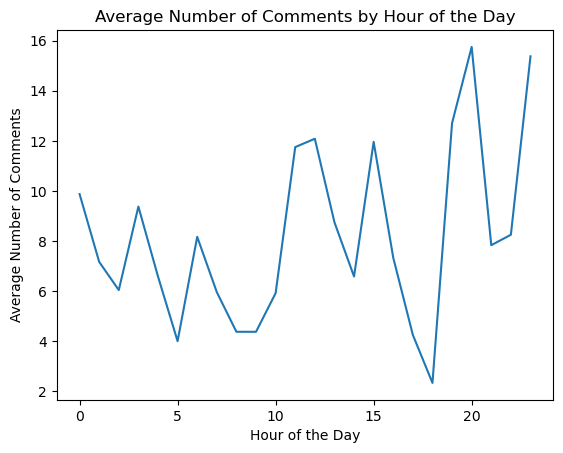

In [38]:

# Convert the created_utc column to a datetime object and extract the hour

comments_df['hour'] = pd.to_datetime(comments_df['created_utc'], unit='s').dt.hour

 

# Group the comments by hour of the day and calculate the mean number of comments

hourly_means = comments_df.groupby('hour')['created_utc'].count().div(24)

 

# Plot a line chart of the average number of comments by hour of the day

plt.plot(hourly_means.index, hourly_means.values)

plt.xlabel('Hour of the Day')

plt.ylabel('Average Number of Comments')

plt.title('Average Number of Comments by Hour of the Day')

plt.show()

# Get Insights from the data

### 1. Yes the length of a post title correlate with score of the post?

### 2. The top 20 words used in post titles is:

In [12]:
from collections import Counter
# convert string to lower, split on white space, then update the counts
results = Counter()
comments_df['body'].str.lower().str.split().apply(results.update)
print(results.most_common(20))

[('the', 5583), ('to', 3616), ('a', 3264), ('and', 3138), ('of', 2596), ('i', 2426), ('in', 1814), ('that', 1813), ('is', 1668), ('for', 1344), ('it', 1344), ('was', 1244), ('you', 1091), ('he', 1054), ('be', 924), ('but', 842), ('this', 817), ('on', 801), ('with', 795), ('they', 773)]


### 3. The top 10 most linked website domains are:

In [18]:
import text_processing

comments_df['urls', 10] = comments_df['body'].apply(text_processing.find_urls)

None
<re.Match object; span=(0, 4), match='BFOR'>
find_urls received the text: This string has no URLs
find_urls found: []
find_urls received the text: This has a url at https://github.com
find_urls found: ['https://github.com']
find_urls received the text: Some people use https://github.com, others use https://bitbucket.com
find_urls found: ['https://github.com,', 'https://bitbucket.com']
find_urls received the text: nan
find_urls found: []
find_urls received the text: They'd be fine.

The problem with poverty is not usually day-to-day costs. People can adjust to that.  It's unexpected expenses that are crippling.

~~*Edit: Why are people still responding two weeks later! Nobody is reading this thread any more! At least not the responses at the bottom*~~ (Edit2: rant was too whiney. If you have something to say, who am I to say otherwise?)
find_urls found: []
find_urls received the text: I doubt a month is enough to really feel the effect
find_urls found: []
find_urls received the tex

### 4. I think it would be interesting to analyze is the least popular posts and comments. Or the most disliked(or "downvoted") comments.